# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Daffa Kurnia Nurfirdaus
- email: daffa.nurfirdaus@gmail.com
- ID Dicoding: Daffa Kurnia Nurfirdaus

# Menentukan Pertanyaan Bisnis
1. Bagaimana pola penggunaan sepeda berdasarkan musim?
2. Pada jam berapa penggunaan sepeda paling tinggi atau rendah?
3. Bagaimana hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dengan jumlah sepeda yang disewa?
4. Bagaimana tingkat penggunaan sepeda pada hari kerja versus akhir pekan?
5. Apakah pengguna terdaftar (registered) lebih sering menggunakan sepeda dibandingkan pengguna kasual?

# Import semua Packages/Libary yang digunakan

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [41]:
hour_df = pd.read_csv('bike-sharing-dataset\\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
day_df = pd.read_csv('bike-sharing-dataset\\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data

In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [44]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [47]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [48]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [49]:
hour_df['cnt_check'] = hour_df['casual'] + hour_df['registered']

anomali = hour_df[hour_df['cnt_check'] != hour_df['cnt']]

print(f"Jumlah baris anomali: {len(anomali)}")
print(anomali)

Jumlah baris anomali: 0
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, cnt_check]
Index: []


In [50]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [51]:
print(f"Jumlah nilai nol di 'hum': {len(day_df[day_df['hum'] == 0])}")


Jumlah nilai nol di 'hum': 1


In [52]:
print(f"Jumlah nilai nol di 'hum': {len(hour_df[hour_df['hum'] == 0])}")


Jumlah nilai nol di 'hum': 22


In [53]:
print("Distribusi nilai pada kolom 'weathersit':")
print(day_df['weathersit'].value_counts())

# Filter data dengan nilai 'weathersit' = 4
weathersit_4 = day_df[day_df['weathersit'] == 4]

if weathersit_4.empty:
    print("\nTidak ada nilai '4' di kolom 'weathersit'.")
else:
    print("\nData dengan nilai 'weathersit' = 4:")
    print(weathersit_4)

Distribusi nilai pada kolom 'weathersit':
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Tidak ada nilai '4' di kolom 'weathersit'.


## Cleaning Data

In [54]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [55]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [56]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [57]:
replacement_value = day_df[day_df['hum'] > 0]['hum'].median()
print(f"Nilai pengganti untuk 'hum' (median): {replacement_value}")

# Ganti nilai nol dengan nilai pengganti
day_df['hum'] = day_df['hum'].replace(0, replacement_value)

Nilai pengganti untuk 'hum' (median): 0.6270834999999999


In [58]:
replacement_value = hour_df[hour_df['hum'] > 0]['hum'].median()
print(f"Nilai pengganti untuk 'hum' (median): {replacement_value}")

# Ganti nilai nol dengan nilai pengganti
hour_df['hum'] = hour_df['hum'].replace(0, replacement_value)

Nilai pengganti untuk 'hum' (median): 0.63


# Exploratory Data Analysis (EDA)

In [59]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_check
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599,181.387599


In [60]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628752,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [61]:
seasonal_usage = day_df.groupby('season')['cnt'].mean()
print(seasonal_usage)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


In [62]:
hourly_usage = hour_df.groupby('hr')['cnt'].mean()
print(hourly_usage)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


# Visualization & Explanatory Analysis

## Pertanyaan 1. Bagaimana pola penggunaan sepeda berdasarkan musim?

In [63]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

avg_rentals_by_season = day_df.groupby('season_name')['cnt'].mean().sort_values()
print(avg_rentals_by_season)

season_name
Spring    2604.132597
Winter    4728.162921
Summer    4992.331522
Fall      5644.303191
Name: cnt, dtype: float64


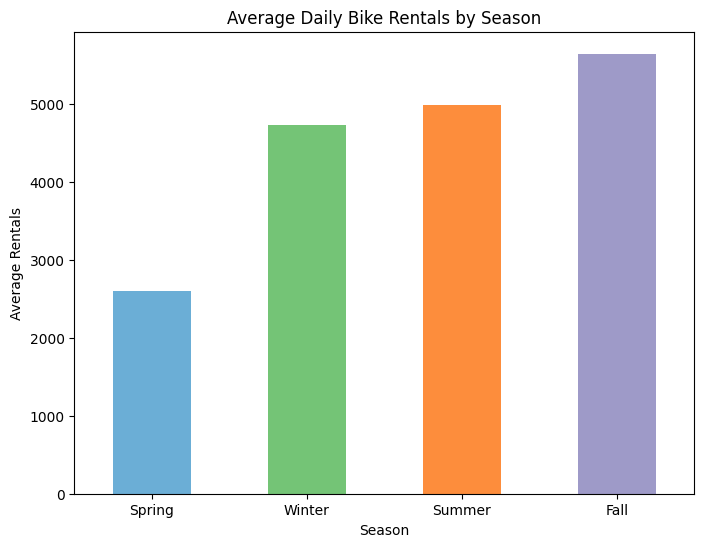

In [64]:
plt.figure(figsize=(8, 6))
avg_rentals_by_season.plot(kind='bar', color=['#6baed6', '#74c476', '#fd8d3c', '#9e9ac8'])
plt.title('Average Daily Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.show()

## Pertanyaan 2 Pada jam berapa penggunaan sepeda paling tinggi atau rendah?

In [65]:
avg_rentals_by_hour = hour_df.groupby('hr')['cnt'].mean()

# Identifikasi jam dengan penggunaan tertinggi dan terendah
max_hour = avg_rentals_by_hour.idxmax()
max_rentals = avg_rentals_by_hour.max()

min_hour = avg_rentals_by_hour.idxmin()
min_rentals = avg_rentals_by_hour.min()

print(f"Penggunaan sepeda tertinggi terjadi pada jam {max_hour} dengan rata-rata {max_rentals:.2f} sepeda.")
print(f"Penggunaan sepeda terendah terjadi pada jam {min_hour} dengan rata-rata {min_rentals:.2f} sepeda.")


Penggunaan sepeda tertinggi terjadi pada jam 17 dengan rata-rata 461.45 sepeda.
Penggunaan sepeda terendah terjadi pada jam 4 dengan rata-rata 6.35 sepeda.


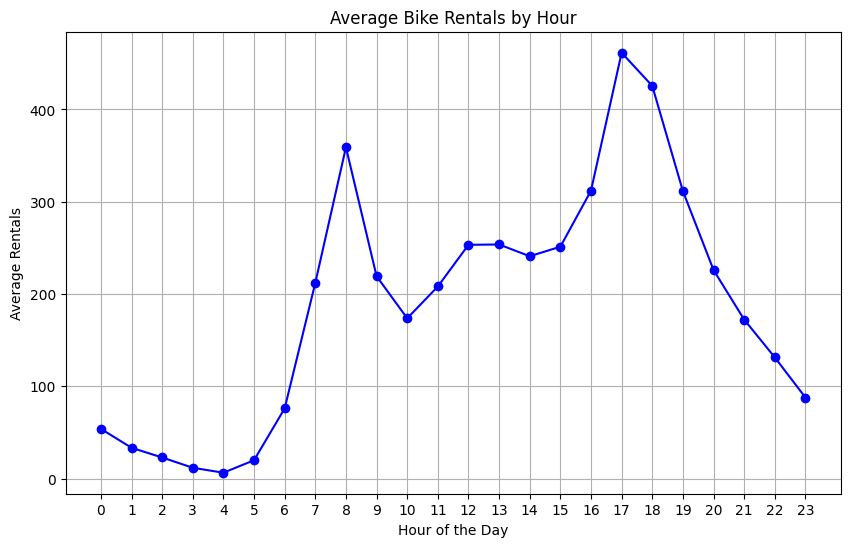

In [66]:
plt.figure(figsize=(10, 6))
avg_rentals_by_hour.plot(kind='line', marker='o', color='blue')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Pertanyaan 3. Bagaimana hubungan antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dengan jumlah sepeda yang disewa?

In [67]:
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi antara variabel cuaca dan jumlah sepeda yang disewa:")
print(correlation)

Korelasi antara variabel cuaca dan jumlah sepeda yang disewa:
               temp       hum  windspeed       cnt
temp       1.000000 -0.072686  -0.023125  0.404772
hum       -0.072686  1.000000  -0.289626 -0.328793
windspeed -0.023125 -0.289626   1.000000  0.093234
cnt        0.404772 -0.328793   0.093234  1.000000


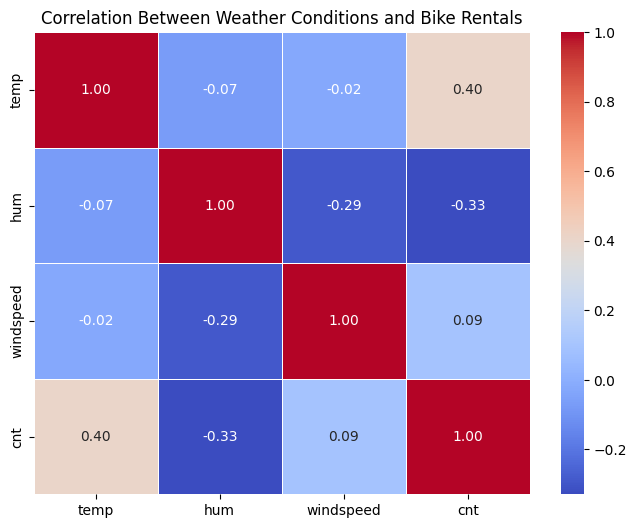

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Weather Conditions and Bike Rentals')
plt.show()


## Pertanyaan 4. Bagaimana tingkat penggunaan sepeda pada hari kerja versus akhir pekan?

In [69]:
usage_by_workingday = day_df.groupby('workingday')['cnt'].mean()

# Tampilkan rata-rata penggunaan sepeda
print("Rata-rata penggunaan sepeda berdasarkan hari:")
print(usage_by_workingday)

Rata-rata penggunaan sepeda berdasarkan hari:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


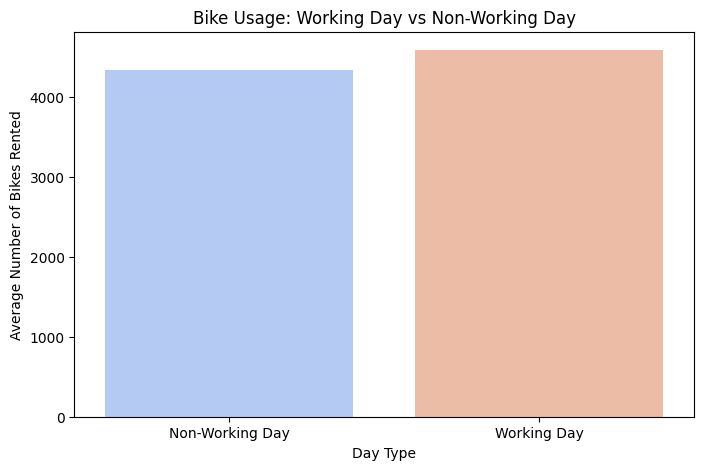

In [70]:
usage_df = pd.DataFrame({
    'Day Type': ['Non-Working Day', 'Working Day'],
    'Average Rentals': usage_by_workingday.values
})

# Gunakan hue
plt.figure(figsize=(8, 5))
sns.barplot(data=usage_df, x='Day Type', y='Average Rentals', hue='Day Type', dodge=False, palette='coolwarm')
plt.title('Bike Usage: Working Day vs Non-Working Day')
plt.ylabel('Average Number of Bikes Rented')
plt.xlabel('Day Type')

plt.show()

## Pertanyaan 5. Apakah pengguna terdaftar (registered) lebih sering menggunakan sepeda dibandingkan pengguna kasual?

In [71]:
avg_usage_day = day_df[['casual', 'registered']].mean()
avg_usage_hour = hour_df[['casual', 'registered']].mean()


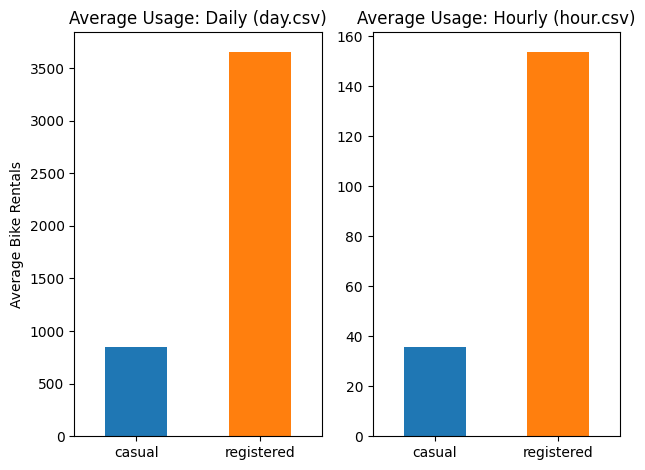

In [72]:
plt.subplot(1, 2, 1)
avg_usage_day.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average Usage: Daily (day.csv)')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
avg_usage_hour.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Average Usage: Hourly (hour.csv)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Conclusion
Pertanyaan 1: Penggunaan sepeda tertinggi terjadi pada musim gugur dengan rata-rata 5644 sepeda.

Pertanyaan 2: Penggunaan sepeda paling tinggi terjadi pada jam 17 dengan rata-rata 461,45 sepeda, dan paling rendah pada jam 4 dengan rata-rata 6,35 sepeda.

Pertanyaan 3:

Suhu memiliki hubungan paling signifikan dengan jumlah sepeda yang disewa: semakin hangat suhu, semakin tinggi penggunaan sepeda.
Kelembaban memiliki hubungan negatif yang cukup kuat: kondisi lembab cenderung menurunkan penggunaan sepeda.
Kecepatan angin memiliki pengaruh yang sangat lemah dan dapat diabaikan terhadap penggunaan sepeda.

Pertanyaan 4: Penggunaan sepeda sedikit lebih tinggi pada hari kerja (4584 sepeda) dibandingkan pada hari non-kerja (4330 sepeda).

Pertanyaan 5: Pengguna terdaftar (registered) cenderung menggunakan sepeda lebih sering daripada pengguna kasual (casual), baik secara harian maupun per jam, dengan rata-rata penggunaan 848/hari untuk pengguna casual dan 3656/hari untuk pengguna registered.

In [74]:
# Menambahkan kolom season_name berdasarkan season_mapping
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

# Data 1: Rata-rata penyewaan sepeda berdasarkan musim
avg_rentals_by_season = day_df.groupby('season_name')['cnt'].mean()
avg_rentals_by_season_df = avg_rentals_by_season.reset_index()
avg_rentals_by_season_df.columns = ['Category', 'Value']
avg_rentals_by_season_df['Description'] = 'Average Rentals by Season'

# Data 2: Rata-rata penyewaan sepeda berdasarkan jam
avg_rentals_by_hour = hour_df.groupby('hr')['cnt'].mean()
avg_rentals_by_hour_df = avg_rentals_by_hour.reset_index()
avg_rentals_by_hour_df.columns = ['Category', 'Value']
avg_rentals_by_hour_df['Description'] = 'Average Rentals by Hour'

# Data 3: Penggunaan sepeda pada hari kerja vs hari libur
usage_by_workingday = day_df.groupby('workingday')['cnt'].mean()
usage_df = pd.DataFrame({
    'Category': ['Non-Working Day', 'Working Day'],
    'Value': usage_by_workingday.values,
    'Description': 'Average Rentals by Day Type'
})

# Data 4: Korelasi variabel cuaca dengan jumlah penyewaan sepeda
correlation = hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr().stack().reset_index()
correlation.columns = ['Category', 'Subcategory', 'Value']
correlation['Description'] = 'Correlation Between Variables'

# Data 5: Rata-rata penggunaan harian vs per jam
avg_usage_day = day_df[['casual', 'registered']].mean()
avg_usage_hour = hour_df[['casual', 'registered']].mean()
avg_usage_df = pd.DataFrame({
    'Category': ['Casual', 'Registered'],
    'Daily Average': avg_usage_day.values,
    'Hourly Average': avg_usage_hour.values
}).melt(id_vars='Category', var_name='Subcategory', value_name='Value')
avg_usage_df['Description'] = 'Average Usage (Daily and Hourly)'

# Menggabungkan semua DataFrame
all_data = pd.concat([
    avg_rentals_by_season_df,
    avg_rentals_by_hour_df,
    usage_df,
    correlation,
    avg_usage_df
], ignore_index=True)

# Menyimpan ke file CSV
all_data.to_csv("main_data2.csv", index=False)

print("Semua data berhasil digabungkan dan disimpan ke file 'main_data2.csv'!")

Semua data berhasil digabungkan dan disimpan ke file 'main_data2.csv'!
